In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from scipy import misc, ndimage
from keras import backend as K

Using TensorFlow backend.


In [2]:
def plots (ims, figsize=(12,6), rows=1, interp=False, titles = None):
    if type(ims[0]) is np.ndarray:
        ims=np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims=ims.transpose(0,2,3,1)
    f = plt.figure(figsize=figsize)
    cols = len(ims/rows if len(ims)%2 == 0 else len(ims)// rows+1)
    for i in range (len(ims)):
        sp=f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsieze =16)
        plt.imshow(ims[i], interpolation=None if interp else 'None')

In [18]:
gen = ImageDataGenerator(
    shear_range=45)
    zoom_range=0.7,
    fill_mode='constant',
    rotation_range=180,
    width_shift_range=.5,
    height_shift_range=.5,
    horizontal_flip=True,
    vertical_flip=True)
    #channel_shift_range=100.)
    #brightness_range=[0.5,1.0], 
    #zca_whitening=True)

" zoom_range=0.7,\n    fill_mode='constant',\n    rotation_range=180,\n    width_shift_range=.5,\n    height_shift_range=.5,\n    horizontal_flip=True,\n    vertical_flip=True)\n    #channel_shift_range=100.)\n    #brightness_range=[0.5,1.0],\n"

In [19]:
image_path = 'plate_food.jpeg'

/Users/Alex/anaconda3/envs/Tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


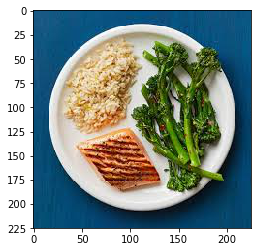

In [20]:
image = np.expand_dims(ndimage.imread(image_path),0)
plt.imshow(image[0])

In [23]:
aug_iter = gen.flow(image)

In [24]:
aug_image = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

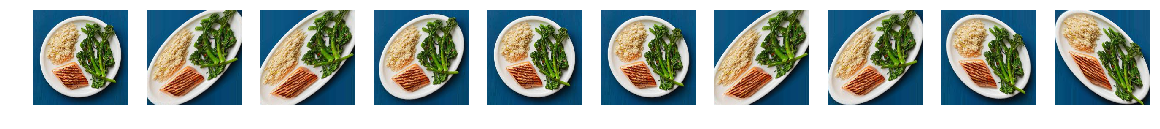

In [25]:
plots(aug_image, figsize=(20,7), rows = 2)